In [1]:
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
data = read_csv('Data_5by5_v21.csv')

In [5]:
# data.dropna()

In [6]:
data.shape

(15210, 10)

In [7]:
data.head()

,Initial Boards,Total Weights^2,Heaviest Queen^2,Lightest Queens^2,Attacks By Heaviest Queen^2,Heaviest Queens Attacks Ratio^2,Total Weights_log,Heaviest Queen_log,Lightest Queens_log,Final Costs
0,[[0 0 0 0 0]\n [0 6 0 0 9]\n [0 0 0 0 0]\n [0 ...,900,81,9,4,0.160000,3.401197,2.197225,1.098612,79
1,[[0 0 0 0 0]\n [6 0 2 0 0]\n [0 0 0 0 0]\n [0 ...,576,49,4,4,0.111111,3.178054,1.945910,0.693147,68
2,[[0 0 0 0 0]\n [3 0 0 0 0]\n [0 0 0 4 0]\n [0 ...,576,81,4,4,0.081633,3.178054,2.197225,0.693147,61
3,[[0 0 0 0 0]\n [8 0 0 0 0]\n [0 0 0 0 2]\n [0 ...,841,81,4,9,0.360000,3.367296,2.197225,0.693147,172
4,[[0 0 0 0 0]\n [8 0 0 0 0]\n [0 0 0 7 0]\n [0 ...,961,81,9,4,0.049383,3.433987,2.197225,1.098612,107


In [8]:
data.corr()

,Total Weights^2,Heaviest Queen^2,Lightest Queens^2,Attacks By Heaviest Queen^2,Heaviest Queens Attacks Ratio^2,Total Weights_log,Heaviest Queen_log,Lightest Queens_log,Final Costs
Total Weights^2,1.000000,0.638114,0.668027,-0.009025,-0.004473,0.988693,0.634502,0.661127,0.559820
Heaviest Queen^2,0.638114,1.000000,0.200124,0.004772,0.007672,0.683983,0.993998,0.200054,0.324422
Lightest Queens^2,0.668027,0.200124,1.000000,-0.007885,-0.001192,0.613801,0.198931,0.965654,0.374913
Attacks By Heaviest Queen^2,-0.009025,0.004772,-0.007885,1.000000,0.755656,-0.007488,0.005635,-0.006697,0.311686
Heaviest Queens Attacks Ratio^2,-0.004473,0.007672,-0.001192,0.755656,1.000000,-0.002871,0.007451,0.000134,0.297629
Total Weights_log,0.988693,0.683983,0.613801,-0.007488,-0.002871,1.000000,0.687718,0.622388,0.553458
Heaviest Queen_log,0.634502,0.993998,0.198931,0.005635,0.007451,0.687718,1.000000,0.200696,0.323478
Lightest Queens_log,0.661127,0.200054,0.965654,-0.006697,0.000134,0.622388,0.200696,1.000000,0.369665
Final Costs,0.559820,0.324422,0.374913,0.311686,0.297629,0.553458,0.323478,0.369665,1.000000


In [9]:
X = data.iloc[:, 1:9]
y = data.iloc[:,-1]

In [10]:
X.shape

(15210, 8)

In [11]:
y.shape

(15210,)

In [12]:
X.head()

,Total Weights^2,Heaviest Queen^2,Lightest Queens^2,Attacks By Heaviest Queen^2,Heaviest Queens Attacks Ratio^2,Total Weights_log,Heaviest Queen_log,Lightest Queens_log
0,900,81,9,4,0.160000,3.401197,2.197225,1.098612
1,576,49,4,4,0.111111,3.178054,1.945910,0.693147
2,576,81,4,4,0.081633,3.178054,2.197225,0.693147
3,841,81,4,9,0.360000,3.367296,2.197225,0.693147
4,961,81,9,4,0.049383,3.433987,2.197225,1.098612


In [13]:
y.head()

0     79
1     68
2     61
3    172
4    107
Name: Final Costs, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12168, 8)
(3042, 8)
(12168,)
(3042,)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = Sequential()

In [19]:
model.add(Dense(128, input_dim = 8, activation = 'relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='relu'))

In [20]:
model.add(Dense(1,activation = 'linear'))

In [21]:
model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = 'adam', metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


In [23]:
tf.debugging.set_log_device_placement(True)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs = 100)

Epoch 1/100
305/305 [==============================] - 2s 3ms/step - loss: 5844.4009 - root_mean_squared_error: 76.4487 - mean_squared_error: 5844.4009 - mean_absolute_error: 59.4190 - val_loss: 2272.1042 - val_root_mean_squared_error: 47.6666 - val_mean_squared_error: 2272.1042 - val_mean_absolute_error: 37.8375
Epoch 2/100
305/305 [==============================] - 1s 2ms/step - loss: 1990.4288 - root_mean_squared_error: 44.6142 - mean_squared_error: 1990.4288 - mean_absolute_error: 35.4371 - val_loss: 1831.6649 - val_root_mean_squared_error: 42.7980 - val_mean_squared_error: 1831.6649 - val_mean_absolute_error: 33.9048
Epoch 3/100
305/305 [==============================] - 1s 2ms/step - loss: 1761.8652 - root_mean_squared_error: 41.9746 - mean_squared_error: 1761.8652 - mean_absolute_error: 33.2647 - val_loss: 1722.5051 - val_root_mean_squared_error: 41.5031 - val_mean_squared_error: 1722.5051 - val_mean_absolute_error: 32.8990
Epoch 4/100
305/305 [==============================] - 

Epoch 27/100
305/305 [==============================] - 1s 2ms/step - loss: 1605.2714 - root_mean_squared_error: 40.0658 - mean_squared_error: 1605.2714 - mean_absolute_error: 31.8452 - val_loss: 1626.3047 - val_root_mean_squared_error: 40.3275 - val_mean_squared_error: 1626.3047 - val_mean_absolute_error: 32.0215
Epoch 28/100
305/305 [==============================] - 1s 2ms/step - loss: 1608.6469 - root_mean_squared_error: 40.1079 - mean_squared_error: 1608.6469 - mean_absolute_error: 31.8502 - val_loss: 1631.0708 - val_root_mean_squared_error: 40.3865 - val_mean_squared_error: 1631.0708 - val_mean_absolute_error: 32.2018
Epoch 29/100
305/305 [==============================] - 1s 2ms/step - loss: 1608.6729 - root_mean_squared_error: 40.1083 - mean_squared_error: 1608.6729 - mean_absolute_error: 31.8633 - val_loss: 1639.6007 - val_root_mean_squared_error: 40.4920 - val_mean_squared_error: 1639.6007 - val_mean_absolute_error: 32.1734
Epoch 30/100
305/305 [==============================

Epoch 53/100
305/305 [==============================] - 1s 2ms/step - loss: 1601.3237 - root_mean_squared_error: 40.0165 - mean_squared_error: 1601.3237 - mean_absolute_error: 31.7874 - val_loss: 1633.5282 - val_root_mean_squared_error: 40.4169 - val_mean_squared_error: 1633.5282 - val_mean_absolute_error: 32.2374
Epoch 54/100
305/305 [==============================] - 1s 2ms/step - loss: 1598.9917 - root_mean_squared_error: 39.9874 - mean_squared_error: 1598.9917 - mean_absolute_error: 31.7685 - val_loss: 1637.2117 - val_root_mean_squared_error: 40.4625 - val_mean_squared_error: 1637.2117 - val_mean_absolute_error: 32.1880
Epoch 55/100
305/305 [==============================] - 1s 2ms/step - loss: 1601.4449 - root_mean_squared_error: 40.0181 - mean_squared_error: 1601.4449 - mean_absolute_error: 31.7691 - val_loss: 1619.5776 - val_root_mean_squared_error: 40.2440 - val_mean_squared_error: 1619.5776 - val_mean_absolute_error: 32.0742
Epoch 56/100
305/305 [==============================

Epoch 79/100
305/305 [==============================] - 1s 2ms/step - loss: 1587.6371 - root_mean_squared_error: 39.8452 - mean_squared_error: 1587.6371 - mean_absolute_error: 31.6592 - val_loss: 1616.6332 - val_root_mean_squared_error: 40.2074 - val_mean_squared_error: 1616.6332 - val_mean_absolute_error: 31.9434
Epoch 80/100
305/305 [==============================] - 1s 3ms/step - loss: 1590.9102 - root_mean_squared_error: 39.8862 - mean_squared_error: 1590.9102 - mean_absolute_error: 31.6635 - val_loss: 1666.0651 - val_root_mean_squared_error: 40.8175 - val_mean_squared_error: 1666.0651 - val_mean_absolute_error: 32.4039
Epoch 81/100
305/305 [==============================] - 1s 3ms/step - loss: 1592.9690 - root_mean_squared_error: 39.9120 - mean_squared_error: 1592.9690 - mean_absolute_error: 31.7049 - val_loss: 1615.0463 - val_root_mean_squared_error: 40.1876 - val_mean_squared_error: 1615.0463 - val_mean_absolute_error: 31.9431
Epoch 82/100
305/305 [==============================

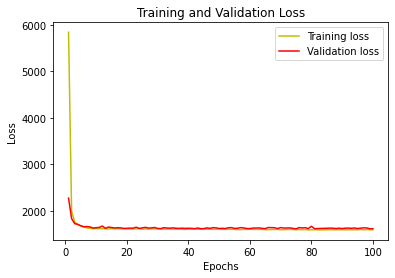

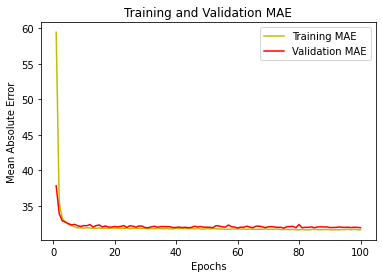

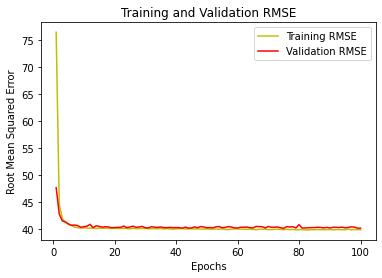

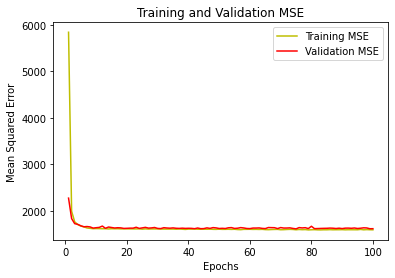

In [24]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs,val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
plt.plot(epochs, mae, 'y', label = 'Training MAE')
plt.plot(epochs, val_mae, 'r', label = 'Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
plt.plot(epochs, rmse, 'y', label = 'Training RMSE')
plt.plot(epochs, val_rmse, 'r', label = 'Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
plt.plot(epochs, mse, 'y', label = 'Training MSE')
plt.plot(epochs, val_mse, 'r', label = 'Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted Values are: ", predictions)
print("Real Values are: ", y_test[:5])

Predicted Values are:  [[161.87859 ]
 [184.5652  ]
 [118.73661 ]
 [ 68.28234 ]
 [125.457634]]
Real Values are:  13852    157
1444     197
3438     192
916      139
3929      92
Name: Final Costs, dtype: int64


In [26]:
import numpy as np

In [27]:
print(np.mean(val_mse))

1638.852462158203


In [28]:
print(np.mean(val_rmse))

40.47503395080567


In [29]:
print(np.mean(val_mae))

32.17445203781128
